In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
# Read the data from a CSV file
df = pd.read_csv('fin inclusion.csv')

In [ ]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
#Checking Missing values

df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

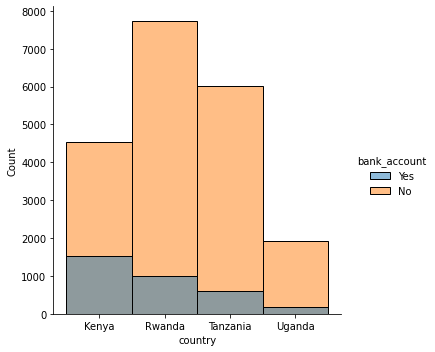

In [ ]:
#Exploring data content for the distribution of account holders across each country
sb.displot(data=df, x="country", hue="bank_account")


In [ ]:
# sb.histplot(data =df, x='country', hue='bank_account' )

In [ ]:
df['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

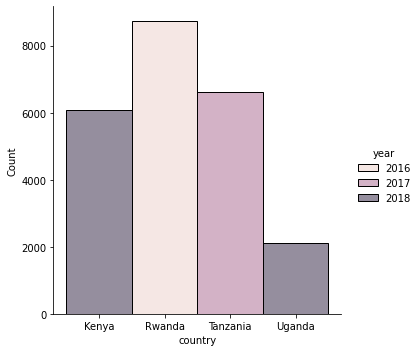

In [ ]:
#checking the year each data was acquired
sb.displot(data=df, x="country", hue="year")


????

In [ ]:
sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


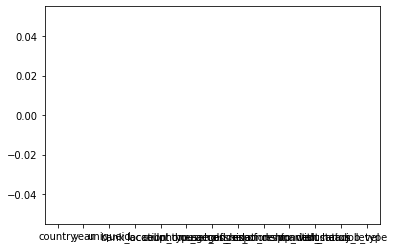

In [ ]:
#Visualizing the missing enttities
base_color = sb.color_palette()[0]
sb.barplot(df.isna().sum().index.values, df.isna().sum(), color=base_color)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

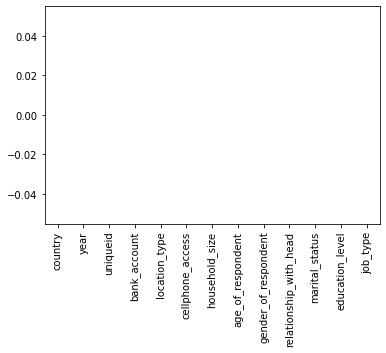

In [ ]:
#Visualizing the missing enttities
base_color = sb.color_palette()[0]
sb.barplot(df.isna().sum().index.values, df.isna().sum(), color = base_color)

# get the current tick locations and labels
plt.xticks(rotation=90) 


#

#### printing the values on the bars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


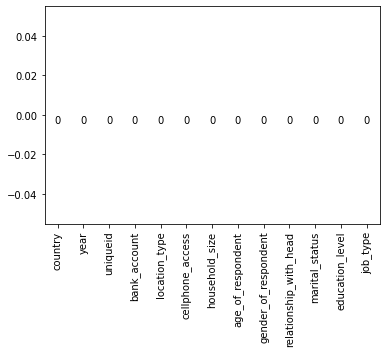

In [ ]:
#Visualizing the missing enttities

sb.barplot(df.isna().sum().index.values, df.isna().sum(), color=base_color) #

# get the current tick locations and labels
plt.xticks(rotation=90) 


# Logic to print value on each bar
for i in range (df.isna().sum().shape[0]):
    count = df.isna().sum()[i]

    #display using plt.text
    plt.text(i, count, count, ha = 'center', va='top')

# Building Univarate plots

### 1.Bank_account Variable

Text(0.5, 0, 'Has a bank account?')

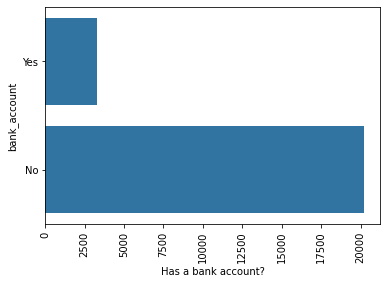

In [ ]:
#Using seaborn
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='bank_account', color= base_color);
plt.xticks(rotation=90)
plt.xlabel('Has a bank account?')

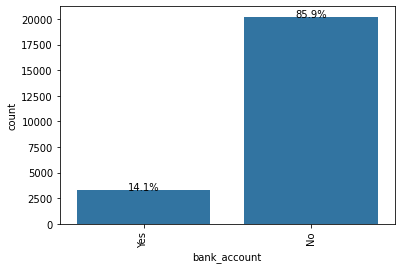

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='bank_account', color=base_color);

# Recalculating the type_counts just to have clarity.
type_counts = df['bank_account'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


#Location type and cellphone access(Both norminal category types)

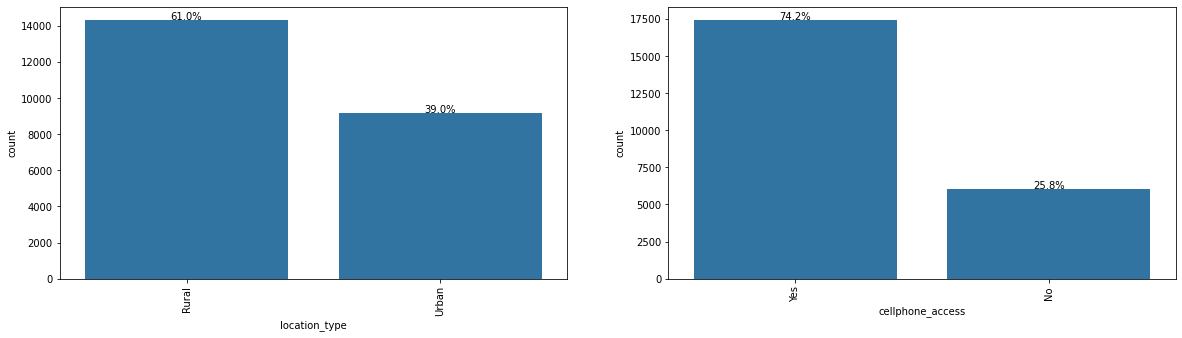

In [ ]:
# Define the figure size
plt.figure(figsize = [20, 5])

# barchart on left: location type
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='location_type', color=base_color);
type_counts = df['location_type'].value_counts()

locs, labels = plt.xticks(rotation=90) #extract labels and their respective locations(dtype=int)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


# barchart on right: ccellphone accesss
plt.subplot(1, 2, 2)
sb.countplot(data=df, x='cellphone_access', color=base_color);
type_counts = df['cellphone_access'].value_counts()

locs, labels = plt.xticks(rotation=90) #extract labels and their respective locations(dtype=int)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


# Household size(discrete numerical)

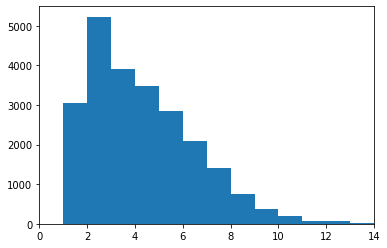

In [ ]:
# Create a new figure
fig = plt.figure()

bins = np.arange(0, df['household_size'].max()+4, 1)

# Generate the x-ticks you want to apply
ticks = df['household_size'].unique().tolist()
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]


# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=df, x='household_size', bins=bins);

plt.xlim((0,14));

# Apply x-ticks
#
#plt.xticks(ticks, labels);

In [ ]:
df['household_size'].value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

#Age of respondent

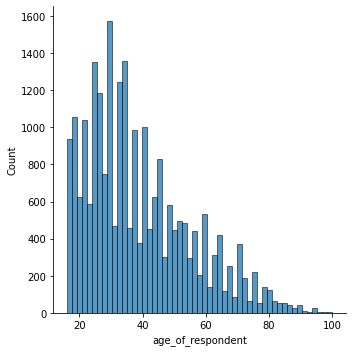

In [ ]:
sb.displot(df['age_of_respondent'], kind='hist');

<Figure size 864x864 with 0 Axes>

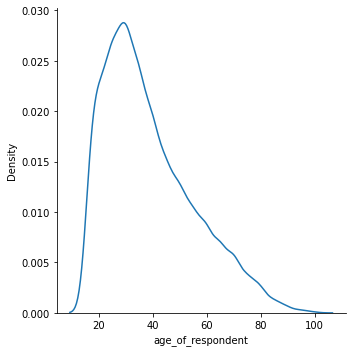

In [ ]:
plt.figure(figsize = [12, 12])

# central plot: kde with narrow bandwidth to show individual probability lumps

sb.displot(df['age_of_respondent'], kind= 'kde');


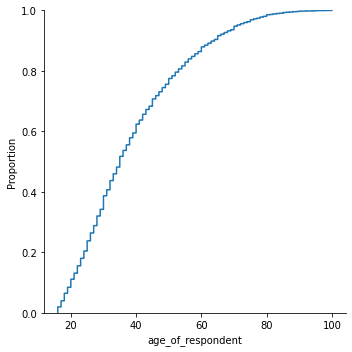

In [ ]:
# # right plot: choosing a different, triangular kernel function (lump shape)

sb.displot(df['age_of_respondent'], kind='ecdf')

#Scalling the numeric columns

### Log scalling for both household and age respondent

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

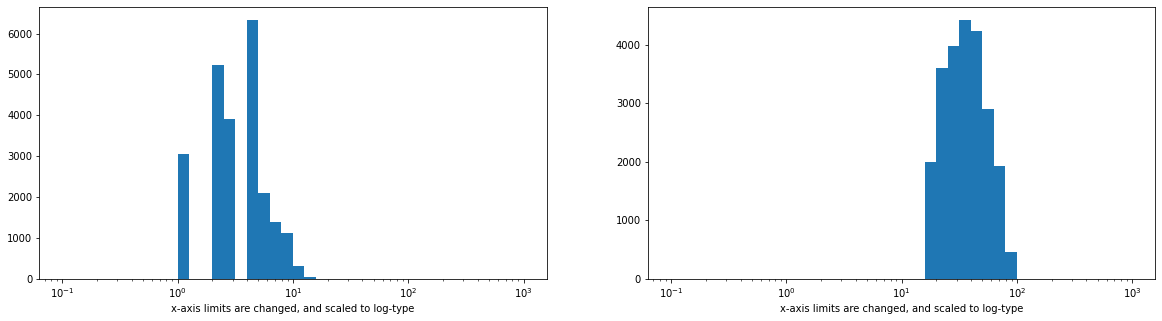

In [ ]:
# Axis transformation
# Define the figure size
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='household_size', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
plt.xlabel('x-axis limits are changed, and scaled to log-type')



plt.subplot(1, 2, 2)
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='age_of_respondent', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
plt.xlabel('x-axis limits are changed, and scaled to log-type')



In [ ]:
df['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

#Simple Bivariate plots and analysis for categoricals

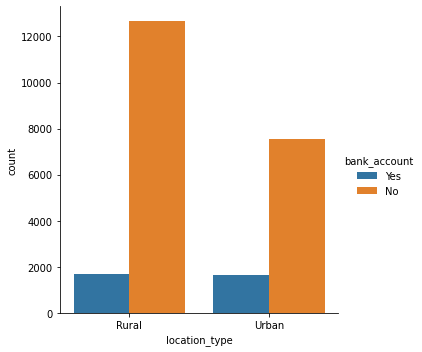

In [ ]:
#comparing the amount of account owners in both rural and urban areas
sb.catplot(data=df, kind="count", x="location_type", hue="bank_account")


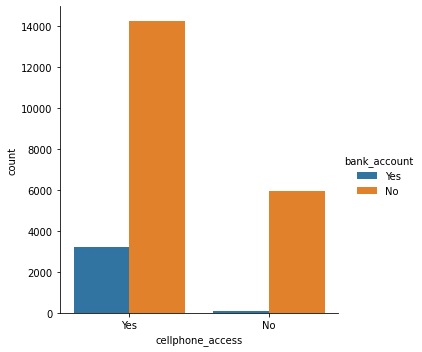

In [ ]:
#plotting a bar plot for cellphone users investigation
sb.catplot(data=df, kind="count", x="cellphone_access", hue="bank_account")


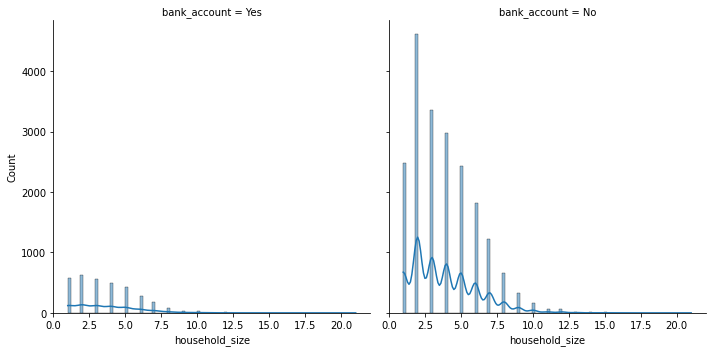

In [ ]:
#Distinguishing account owners from none account owners with histograms
sb.displot(data=df, x="household_size", col="bank_account", kde=True)

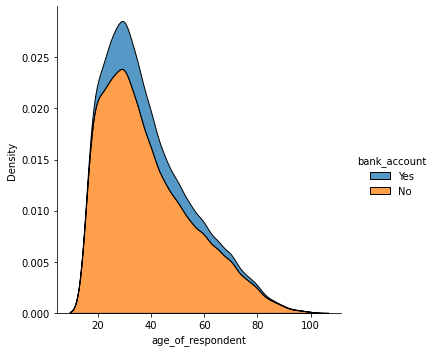

In [ ]:
#plotting a density plot for age relating with the bank account variable
sb.displot(data=df, x="age_of_respondent", hue="bank_account", multiple="stack", kind="kde")

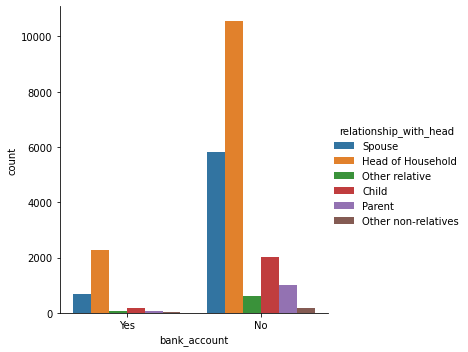

In [ ]:
#plotting a bivariate bar plot for relationship_with_head investigation
sb.catplot(data=df, kind="count", x="bank_account", hue="relationship_with_head")


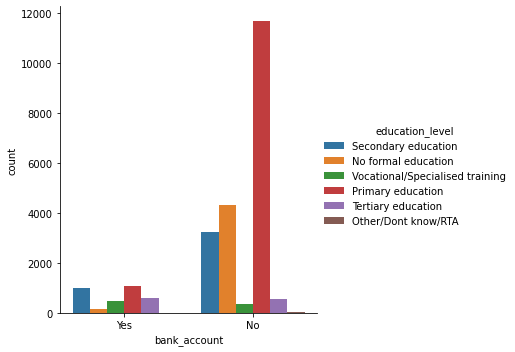

In [ ]:
#plotting a bar plot for education level users investigation
sb.catplot(data=df, kind="count", x="bank_account", hue="education_level")


# CORRELATION AND MULTIVARIATE RELATIONSHIPS

### Non-Positional Encodings for Third Variables
There are four major cases to consider when we want to plot three variables together:

- Three numeric variables
- Two numeric variables and one categorical variable
- One numeric variable and two categorical variables
- Three categorical variables

Three main non-positional encodings stand out:
shape
size
color


#ENCODING 2 NUMERICAL VARIABLES AND ONE CATEGORICAL WITH SHAPE AND COLOR

In [3]:
cat_markers = [['Yes', 'o'],  #Markers for Bank account variable
               ['No', 's']]

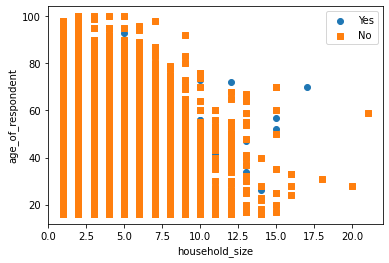

In [6]:
for cat, marker in cat_markers:
    df_cat = df[df['bank_account'] == cat]  #categorical variable
    plt.scatter(data = df_cat, x = 'household_size', y = 'age_of_respondent', marker = marker)
    
plt.legend(['Yes','No'])
plt.xlabel('household_size')
plt.ylabel('age_of_respondent')

plt.show()

### 3 NUMERIC VARIABLES: ENCODING USING SHAPES

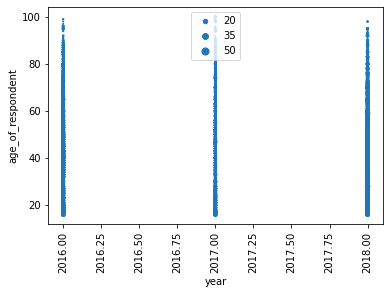

In [7]:
plt.scatter(data = df, x = 'year', y = 'age_of_respondent', s = 'household_size')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.xticks(rotation=90)

plt.xlabel('year')
plt.ylabel('age_of_respondent')

plt.show()

#ENCODING VIA COLOR: 2 NUMERICAL AND ONE CAT

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


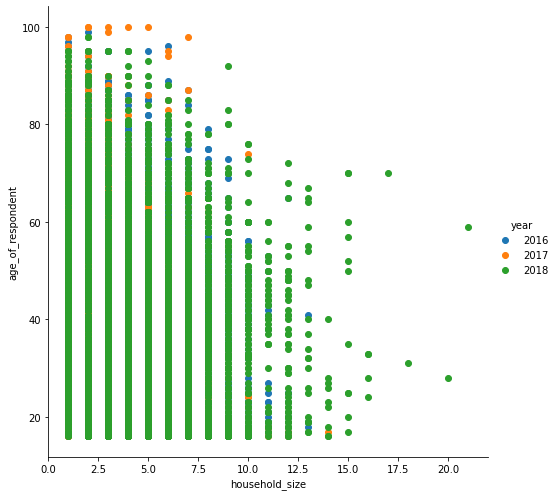

In [ ]:
g = sb.FacetGrid(data = df, hue = 'year', size = 7)
g.map(plt.scatter ,'household_size' , 'age_of_respondent')
g.add_legend()

In [ ]:
df['year'].value_counts() 

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


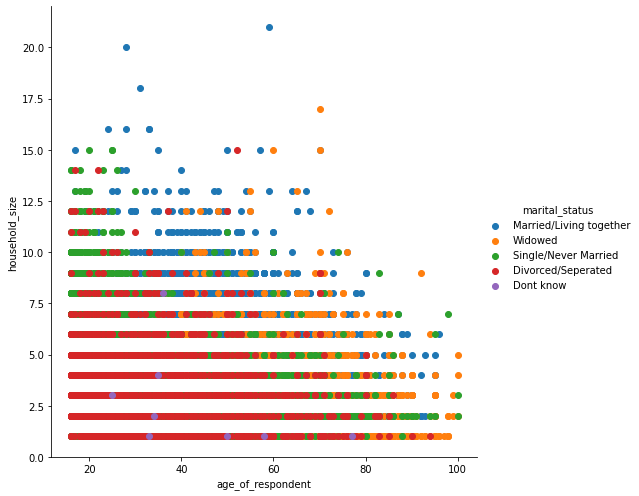

In [ ]:
g = sb.FacetGrid(data = df, hue = 'marital_status', size = 7)
g.map(plt.scatter  , 'age_of_respondent','household_size')
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


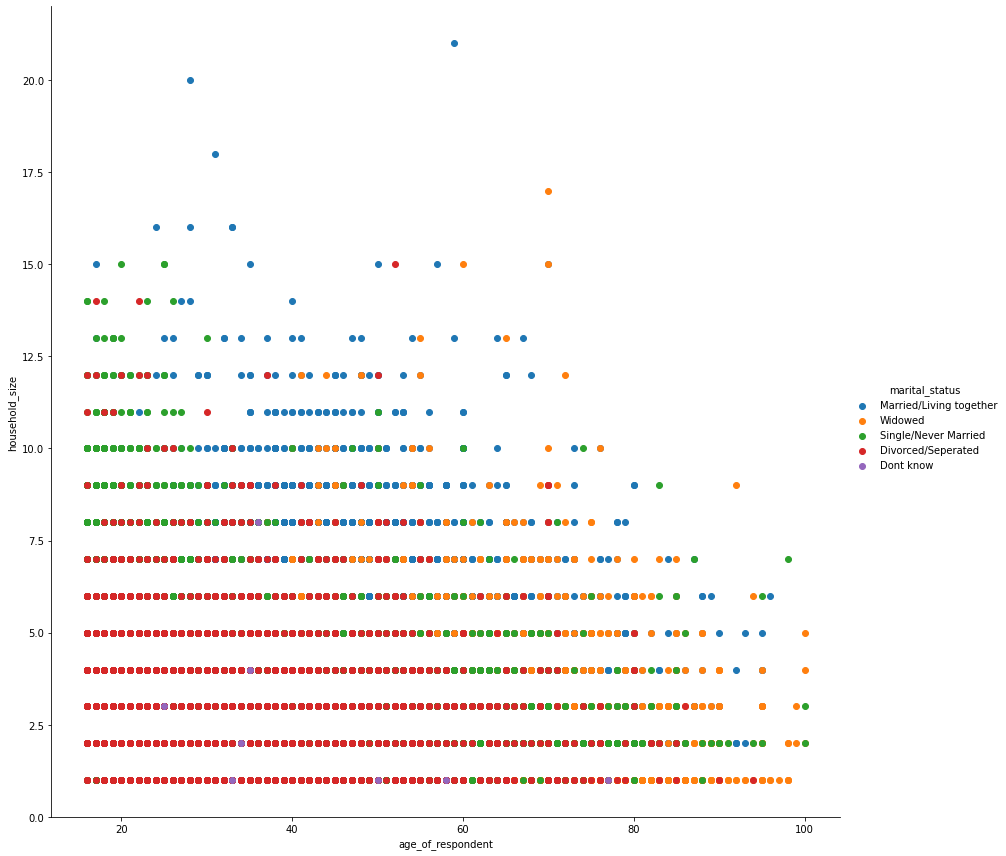

In [ ]:
# tweaking size argument when dealing with multiple categories

g = sb.FacetGrid(data = df, hue = 'marital_status', size = 12)
g.map(plt.scatter  , 'age_of_respondent','household_size')
g.add_legend()

Text(0, 0.5, 'age_of_respondent')

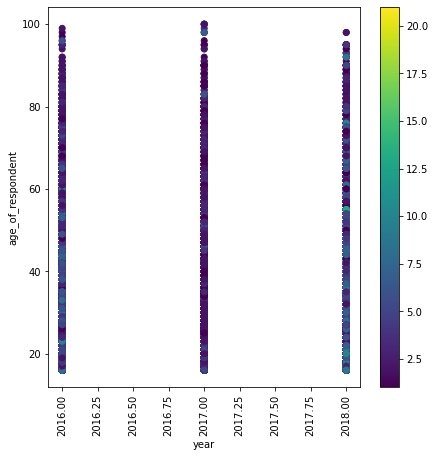

In [ ]:
#Using color bars and legend for color descriptiond and encoding
# Define the figure size
plt.figure(figsize = [7, 7])
plt.scatter(data = df, x = 'year', y = 'age_of_respondent', c = 'household_size')
plt.colorbar()
plt.xticks(rotation=90)

plt.xlabel('year')
plt.ylabel('age_of_respondent')

##Faceting for Multivariate Data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


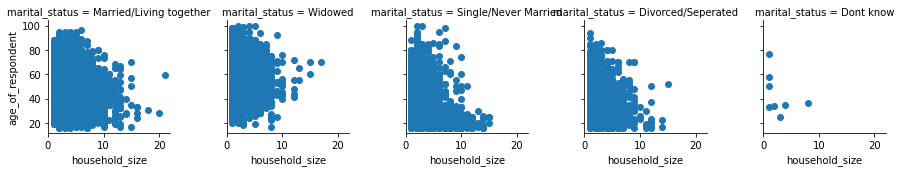

In [ ]:
#Faceting on a simple column basis

g = sb.FacetGrid(data = df, col = 'marital_status', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'household_size', 'age_of_respondent')

In [ ]:
# from seaborn.relational import scatterplot
# 1. select a group/category 
# 2. plot scatterplot between another 2 numerical varaiables

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


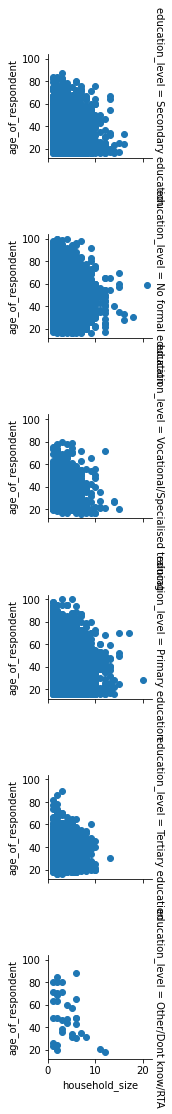

In [ ]:
#Faceting on a simple column basis

g = sb.FacetGrid(data = df, row = 'education_level', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'household_size', 'age_of_respondent')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


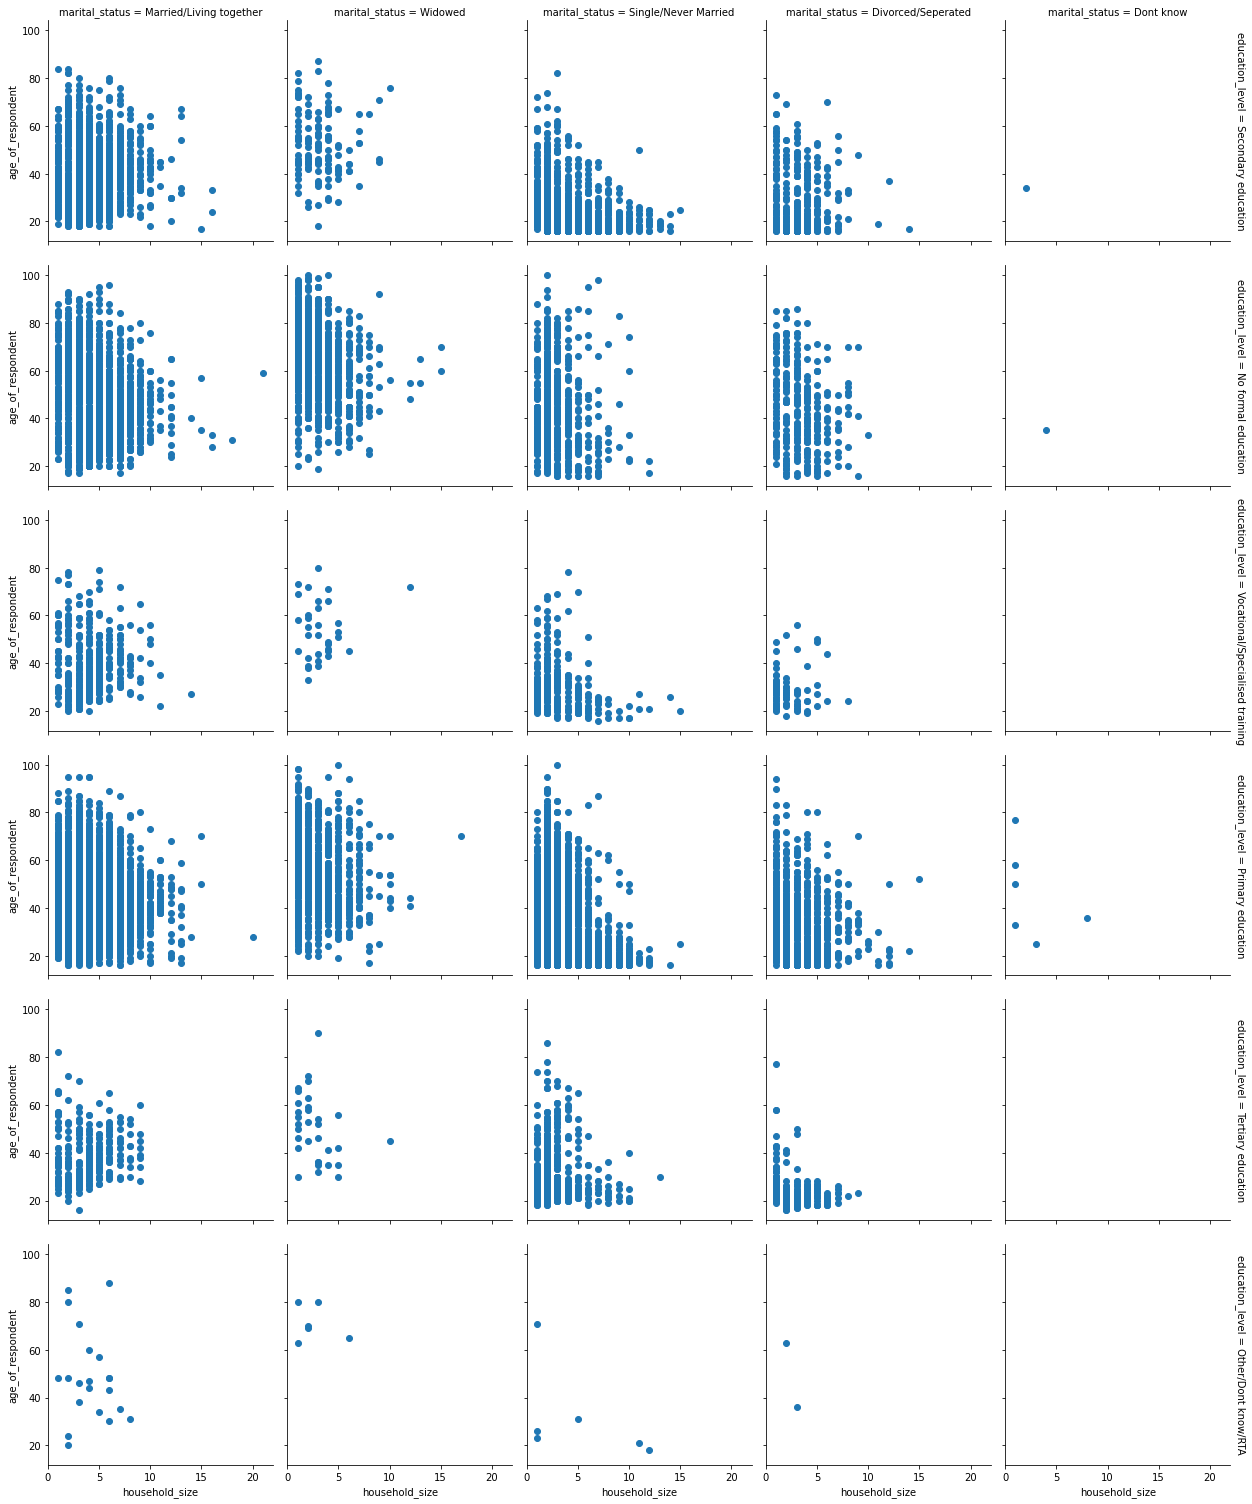

In [ ]:
#Faceting on a simple row and column basis

g = sb.FacetGrid(data = df, col = 'marital_status', row = 'education_level',size = 3.5,
                margin_titles = True)
g.map(plt.scatter, 'household_size', 'age_of_respondent')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 1224x1224 with 0 Axes>

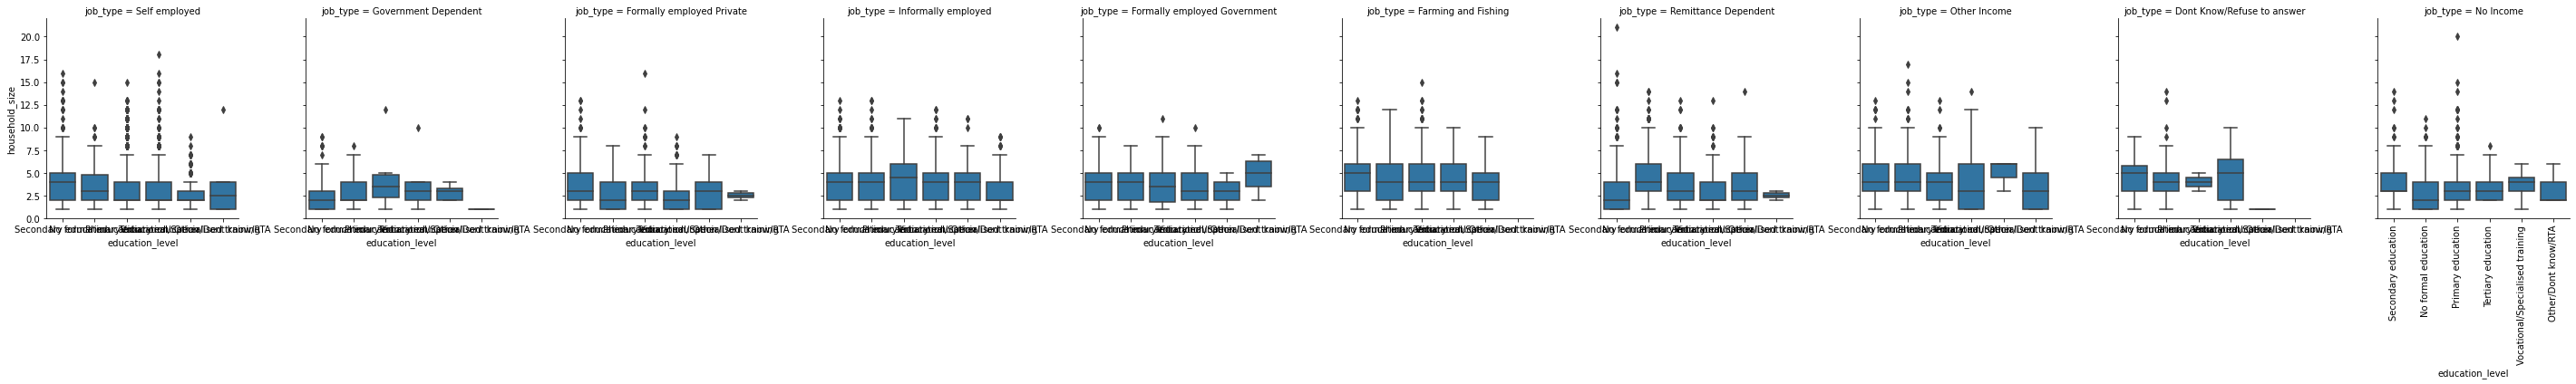

In [ ]:
#Also applying to the boxplot scenario
# Define the figure size
plt.figure(figsize = [17, 17])

g = sb.FacetGrid(data = df, col = 'job_type', size = 4)

g.map(sb.boxplot, 'education_level', 'household_size')

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

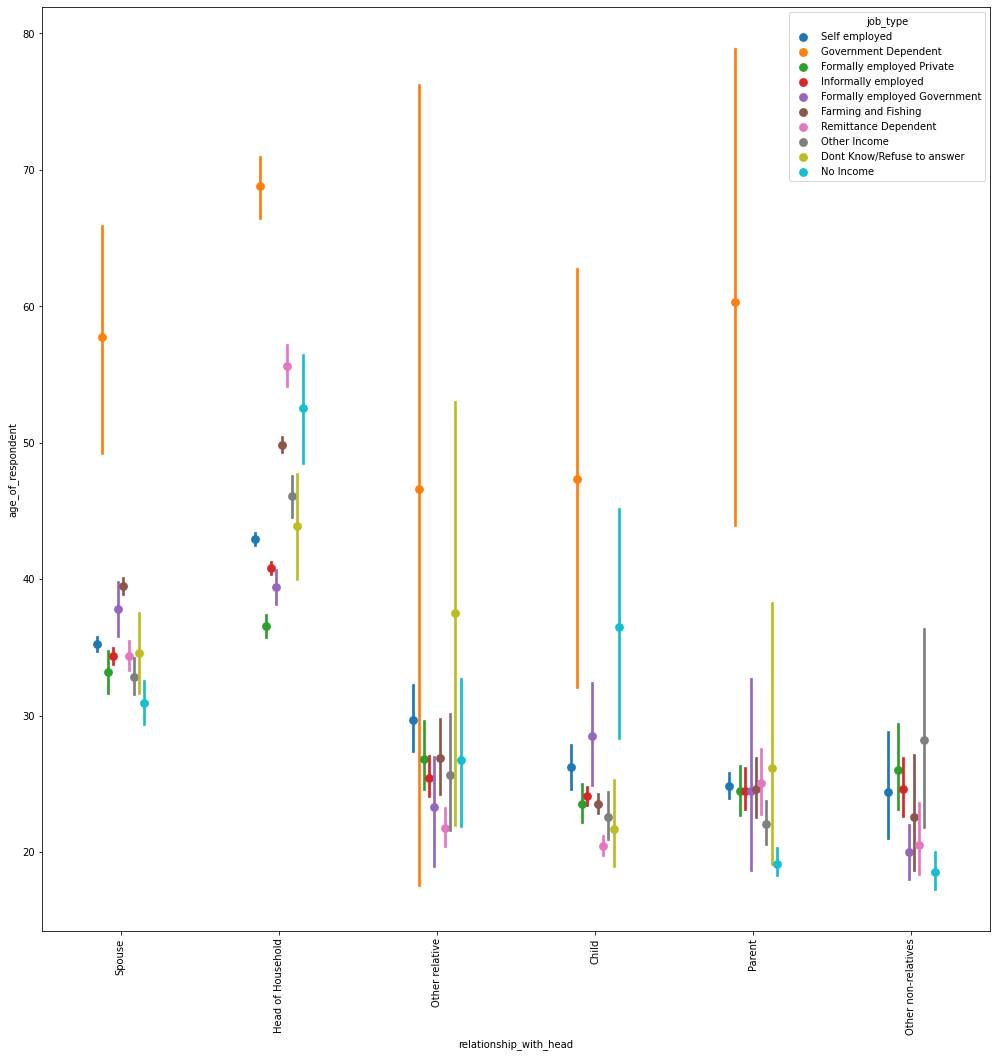

In [ ]:
#It gets a bit messy with multiple cats within the hue var
#Applying and interpreting pointplots for 2 cat vars and 1 num var
plt.figure(figsize = [17, 17])

ax = sb.pointplot(data = df, x = 'relationship_with_head', y = 'age_of_respondent', hue = 'job_type',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90)

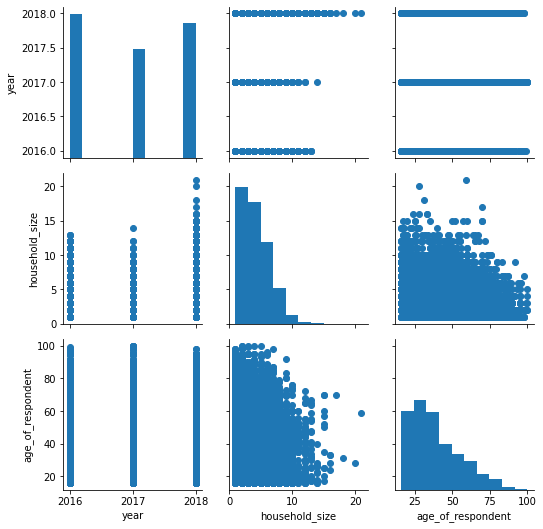

In [ ]:
#Pair grids and pairplots

g = sb.PairGrid(data = df)  # Plots for all vars in the df if the 'vars' is not specified
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#Take note that just like your correlation, it would only establish or plot numerical variables except the have been encoded 

# VARIABLE ENCODING AND CORRELATIONS

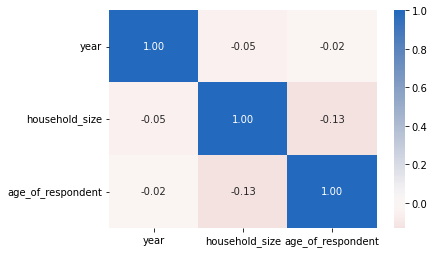

In [ ]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

#We have to encode cat features before computing correlation. Also assign ordinance where necessary

In [ ]:
traincp = df.copy()

In [ ]:
#Now , we assign priors to each unique category to encode
#created a new column to store the new encoding

#df['priors_label']= df['label'].map({'porn':0.25, 'notporn':0.75}, na_action= 'ignore')

In [ ]:
# ENCODING CATEGORICAL DATA USING DUMMY VARIABLES

# Encoding the INDEPENDENT Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
traincp['bank_account'] = labelencoder_X.fit_transform(traincp['bank_account'])
traincp['location_type'] = labelencoder_X.fit_transform(traincp['location_type'])
traincp['cellphone_access'] = labelencoder_X.fit_transform(traincp['cellphone_access'])
traincp['gender_of_respondent'] = labelencoder_X.fit_transform(traincp['gender_of_respondent'])
traincp['relationship_with_head'] = labelencoder_X.fit_transform(traincp['relationship_with_head'])
traincp['marital_status'] = labelencoder_X.fit_transform(traincp['marital_status'])
traincp['education_level'] = labelencoder_X.fit_transform(traincp['education_level'])
traincp['job_type'] = labelencoder_X.fit_transform(traincp['job_type'])

In [ ]:
traincp['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [ ]:
df['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [ ]:
traincp.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [ ]:
#one hot encoding and dealing with education level

# Encoding the ordinal Variable and mintaining ranking

onehotencoder = OneHotEncoder(categorical_features = [7])
X_train = onehotencoder.fit_transform(X_train).toarray()


#SCALING AND COMPARING TRANSFORMATIONS

In [ ]:
traincp.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
traincp=traincp[['bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

sbb = sc.fit_transform(traincp)


In [ ]:
new_sb = pd.DataFrame(sb, columns=traincp.columns.tolist())

In [ ]:
new_sb.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2.470356,-0.800064,0.589721,-0.358007,-0.896188,-0.833774,1.469737,-0.392962,0.833891,1.154628
1,-0.404800,-0.800064,-1.695716,0.539834,1.888279,-0.833774,-0.642916,1.608127,-1.655191,-0.464207
2,2.470356,1.249899,0.589721,0.539834,-0.775124,1.199366,0.413411,0.607583,2.493279,1.154628
3,-0.404800,-0.800064,0.589721,0.539834,-0.290869,-0.833774,-0.642916,-0.392962,0.004197,-0.787975
4,-0.404800,1.249899,-1.695716,1.886596,-0.775124,1.199366,-1.171079,0.607583,0.004197,-0.140440


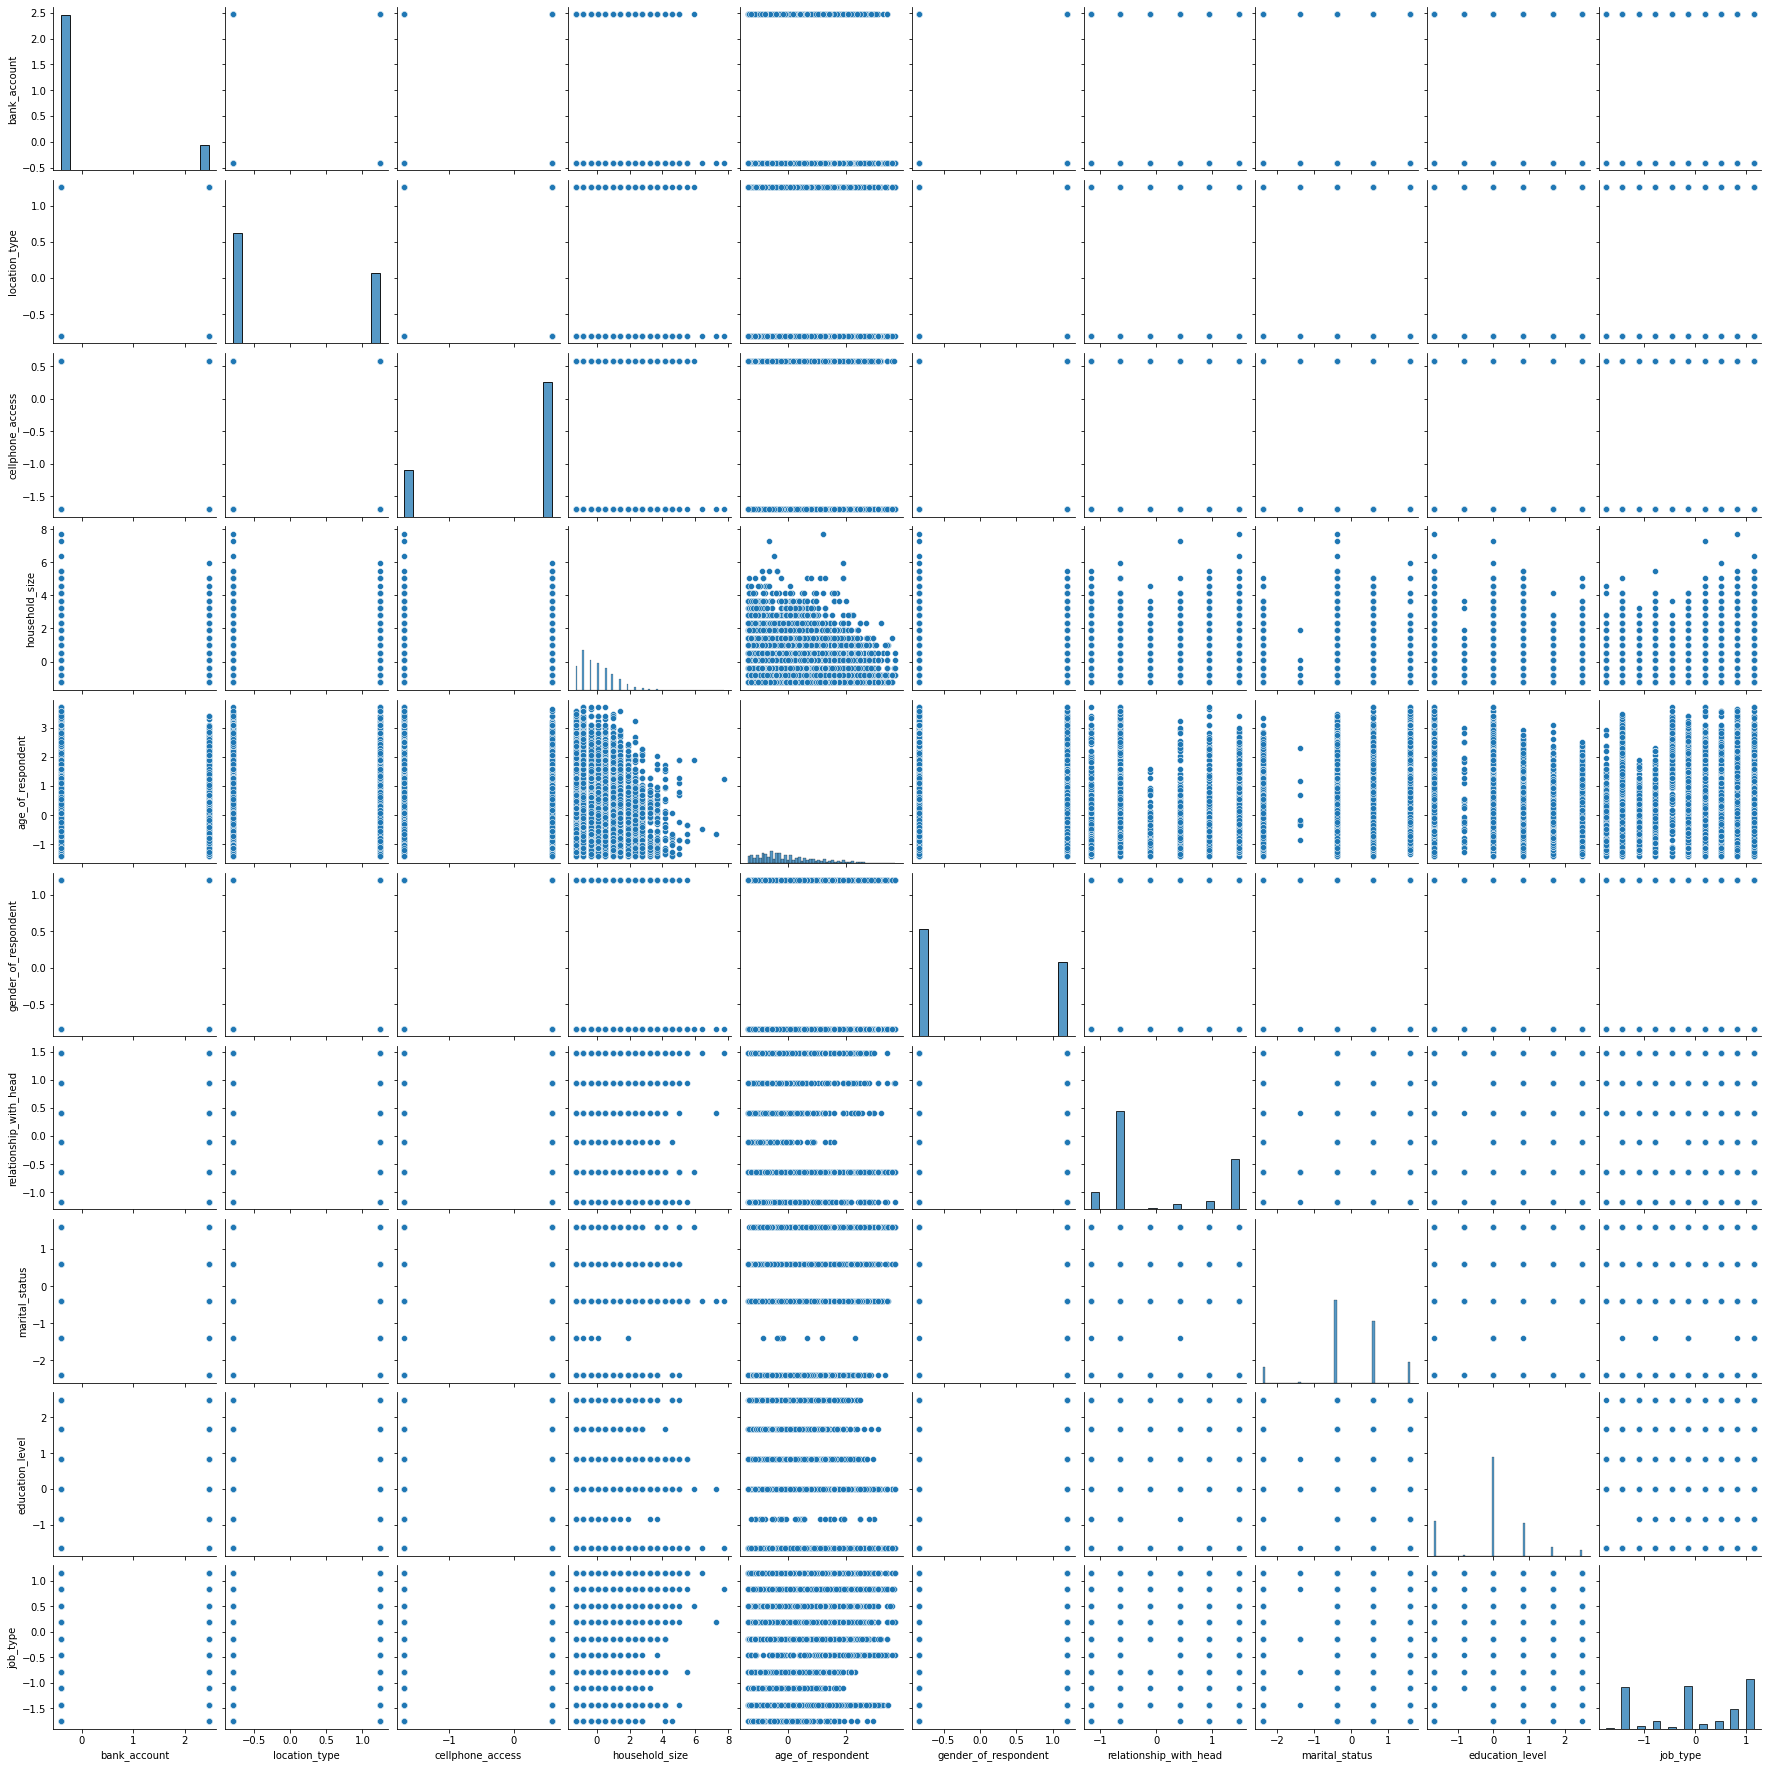

In [ ]:
sb.pairplot(new_sb)

In [ ]:
# # let's plot a histogram with the fitted parameters used by the function
# sns.distplot(df.price , fit=norm);
# (mu, sigma) = norm.fit(df.price)
# #plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
# #            loc='best')
# plt.title('Frequency plot for House prices');
# print("Skewness: %f" % df.price.skew())

# plt.savefig('skewness plot House Price.png')

In [ ]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


([], <a list of 0 Text major ticklabel objects>)

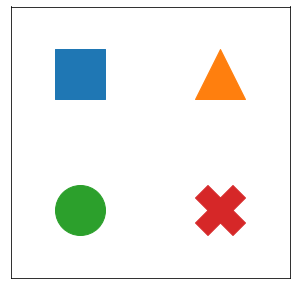

In [ ]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])